In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#data loaded

In [2]:
car_df= pd.read_csv("C:\data\car_dataset.csv")
car_df.head(1374)

,car_name,year,fuel_type,km,price
0,Maruti Suzuki Swift VDi,2009.0,Diesel,62071,290000.0
1,BMW X3 M,2019.0,Petrol,7216,12300000.0
2,Porsche Macan Turbo,2017.0,Petrol,7000,6200000.0
3,Honda Mobilio V,2015.0,Diesel,77991,665000.0
4,Land Rover Range Rover Evoque SE Dynamic,2018.0,Diesel,24205,4915000.0
...,...,...,...,...,...
1368,Toyota Innova 2.5 VX BS IV 7 STR,2011.0,Diesel,81000,995000.0
1369,Mahindra Xylo E8 ABS BS IV,2011.0,Diesel,83000,535000.0
1370,Maruti Suzuki Ritz Vdi BS IV,2015.0,Diesel,66000,495000.0
1371,Maruti Suzuki Ertiga LDi,NaN,Diesel,52000,650000.0


In [3]:
car_df.isnull().sum()

car_name       0
year         116
fuel_type     15
km            10
price          8
dtype: int64

In [4]:
car_df['fuel_type']= car_df['fuel_type'].fillna(car_df['fuel_type'].mode()[0])

In [5]:
car_df['fuel_type'].isnull().sum()

0

In [6]:
print(car_df.dtypes)

car_name      object
year         float64
fuel_type     object
km            object
price        float64
dtype: object


In [7]:
car_df['km'] = car_df['km'].astype(float)

In [8]:
car_df['year']= car_df['year'].fillna(car_df['year'].median())
car_df['km']= car_df['km'].fillna(car_df['km'].mean())
car_df['price']= car_df['price'].fillna(car_df['price'].mean())

In [9]:
car_df.isnull().sum()

car_name     0
year         0
fuel_type    0
km           0
price        0
dtype: int64

In [10]:
car_dum= pd.get_dummies(car_df['fuel_type'])
car_dum

,CNG,CNGandHybrids,Diesel,Electric,Hybrid,LPG,Petrol
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
1368,0,0,1,0,0,0,0
1369,0,0,1,0,0,0,0
1370,0,0,1,0,0,0,0
1371,0,0,1,0,0,0,0


In [11]:
from sklearn.preprocessing import OneHotEncoder 
ohe= OneHotEncoder(sparse= False)

In [12]:
hot_array= ohe.fit_transform(car_df[['fuel_type']])
hot_array

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
car_dum.keys()

Index(['CNG', 'CNGandHybrids', 'Diesel', 'Electric', 'Hybrid', 'LPG',
       'Petrol'],
      dtype='object')

In [14]:
encoded_fuel= pd.DataFrame(hot_array, columns=['CNG', 'CNGandHybrids', 'Diesel', 'Electric', 'Hybrid', 'LPG',
       'Petrol'])
encoded_fuel

,CNG,CNGandHybrids,Diesel,Electric,Hybrid,LPG,Petrol
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1368,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1369,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1370,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1371,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
car_df=car_df.drop(['fuel_type'], axis=1)
car_df

,car_name,year,km,price
0,Maruti Suzuki Swift VDi,2009.0,62071.0,290000.0
1,BMW X3 M,2019.0,7216.0,12300000.0
2,Porsche Macan Turbo,2017.0,7000.0,6200000.0
3,Honda Mobilio V,2015.0,77991.0,665000.0
4,Land Rover Range Rover Evoque SE Dynamic,2018.0,24205.0,4915000.0
...,...,...,...,...
1368,Toyota Innova 2.5 VX BS IV 7 STR,2011.0,81000.0,995000.0
1369,Mahindra Xylo E8 ABS BS IV,2011.0,83000.0,535000.0
1370,Maruti Suzuki Ritz Vdi BS IV,2015.0,66000.0,495000.0
1371,Maruti Suzuki Ertiga LDi,2014.0,52000.0,650000.0


In [16]:
car_df_new= car_df

In [17]:
car_df_new = pd.concat([car_df_new,encoded_fuel],axis=1, sort=False)
car_df_new

,car_name,year,km,price,CNG,CNGandHybrids,Diesel,Electric,Hybrid,LPG,Petrol
0,Maruti Suzuki Swift VDi,2009.0,62071.0,290000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,BMW X3 M,2019.0,7216.0,12300000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Porsche Macan Turbo,2017.0,7000.0,6200000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Honda Mobilio V,2015.0,77991.0,665000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Land Rover Range Rover Evoque SE Dynamic,2018.0,24205.0,4915000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1368,Toyota Innova 2.5 VX BS IV 7 STR,2011.0,81000.0,995000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1369,Mahindra Xylo E8 ABS BS IV,2011.0,83000.0,535000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1370,Maruti Suzuki Ritz Vdi BS IV,2015.0,66000.0,495000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1371,Maruti Suzuki Ertiga LDi,2014.0,52000.0,650000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
len(car_df_new['car_name'].unique())

826

In [19]:
car_df_new.car_name.value_counts().to_dict()

{'Maruti Suzuki Wagon R': 16,
 'Mahindra TUV300 T6 Plus': 14,
 'Maruti Suzuki Swift VDi': 12,
 'Toyota Innova 2.5 ': 12,
 'Maruti Suzuki Vitara Brezza ZDi': 11,
 'Maruti Suzuki Alto LXi BS III': 11,
 'Maruti Suzuki Swift': 10,
 'Maruti Suzuki Swift Dzire VDi': 9,
 'Maruti Suzuki Alto 800 Lxi': 9,
 'Hyundai i10 Sportz 1.2': 8,
 'Tata Tiago Revotron XZ': 7,
 'Honda Brio S MT': 7,
 'Maruti Suzuki Ertiga VDi': 7,
 'Toyota Innova Crysta 2.8': 7,
 'Maruti Suzuki Wagon R ': 7,
 'Mahindra Quanto C8': 7,
 'Mahindra XUV500': 7,
 'Volkswagen Polo IPL II 1.2  Highline': 6,
 'Honda City 1.5 V MT': 6,
 'Hyundai Grand i10 Magna 1.2 Kappa VTVT': 6,
 'Hyundai Santro Xing XL eRLX Euro III': 6,
 ' Maruti Suzuki Wagon R': 6,
 'Volkswagen Polo GT TSI': 5,
 'Maruti Suzuki Omni E 8 STR BS IV': 5,
 'Renault Duster 110 PS RxZ ': 5,
 'Mahindra Bolero SLX': 5,
 'Renault Kwid RXT': 5,
 'Hyundai i10 Magna': 5,
 'Volkswagen Polo  Highline': 5,
 'Volkswagen Polo Comfortline 1.2L P': 5,
 'Hyundai Verna Fluidic New': 

In [20]:
car_df_new_frequency_map= car_df_new.car_name.value_counts().to_dict()

In [21]:
car_df_new.car_name= car_df_new.car_name.map(car_df_new_frequency_map)
car_df_new.head()

,car_name,year,km,price,CNG,CNGandHybrids,Diesel,Electric,Hybrid,LPG,Petrol
0,12,2009.0,62071.0,290000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2019.0,7216.0,12300000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2017.0,7000.0,6200000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,2015.0,77991.0,665000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,2018.0,24205.0,4915000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
car_df_new['zscore']= (car_df_new.km - car_df_new.km.mean())/car_df_new.km.std()
car_df_new.head()

,car_name,year,km,price,CNG,CNGandHybrids,Diesel,Electric,Hybrid,LPG,Petrol,zscore
0,12,2009.0,62071.0,290000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.141596
1,1,2019.0,7216.0,12300000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.905615
2,1,2017.0,7000.0,6200000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.908624
3,1,2015.0,77991.0,665000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.080137
4,1,2018.0,24205.0,4915000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.668993


In [23]:
car_df_new= car_df_new[(car_df_new.zscore>-3) & (car_df_new.zscore<3)]
car_df_new.shape

(1363, 12)

In [24]:
car_df_new['zscore1']= (car_df_new.year - car_df_new.year.mean())/car_df_new.year.std()
car_df_new.head()

<ipython-input-24-0093276c8267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_new['zscore1']= (car_df_new.year - car_df_new.year.mean())/car_df_new.year.std()


,car_name,year,km,price,CNG,CNGandHybrids,Diesel,Electric,Hybrid,LPG,Petrol,zscore,zscore1
0,12,2009.0,62071.0,290000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.141596,-0.998172
1,1,2019.0,7216.0,12300000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.905615,1.231438
2,1,2017.0,7000.0,6200000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.908624,0.785516
3,1,2015.0,77991.0,665000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.080137,0.339594
4,1,2018.0,24205.0,4915000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.668993,1.008477


In [25]:
car_df_new= car_df_new[(car_df_new.zscore1>-3) & (car_df_new.zscore1<3)]
car_df_new.shape

(1345, 13)

In [26]:
car_df_new['zscore2']= (car_df_new.price - car_df_new.price.mean())/car_df_new.price.std()
car_df_new.head()

,car_name,year,km,price,CNG,CNGandHybrids,Diesel,Electric,Hybrid,LPG,Petrol,zscore,zscore1,zscore2
0,12,2009.0,62071.0,290000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.141596,-0.998172,-0.380458
1,1,2019.0,7216.0,12300000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.905615,1.231438,8.694139
2,1,2017.0,7000.0,6200000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.908624,0.785516,4.085060
3,1,2015.0,77991.0,665000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.080137,0.339594,-0.097113
4,1,2018.0,24205.0,4915000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.668993,1.008477,3.114131


In [27]:
car_df_new= car_df_new[(car_df_new.zscore2>-3) & (car_df_new.zscore2<3)]
car_df_new.shape

(1313, 14)

In [28]:
car_df_new= car_df_new.drop(['zscore', 'zscore1', 'zscore2'], axis=1)
car_df_new

,car_name,year,km,price,CNG,CNGandHybrids,Diesel,Electric,Hybrid,LPG,Petrol
0,12,2009.0,62071.0,290000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,2015.0,77991.0,665000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1,2018.0,34000.0,1750000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,2,2018.0,58000.0,2850000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1,2006.0,71000.0,175000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1368,1,2011.0,81000.0,995000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1369,1,2011.0,83000.0,535000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1370,3,2015.0,66000.0,495000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1371,1,2014.0,52000.0,650000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
col_names= car_df_new.columns

<AxesSubplot:>

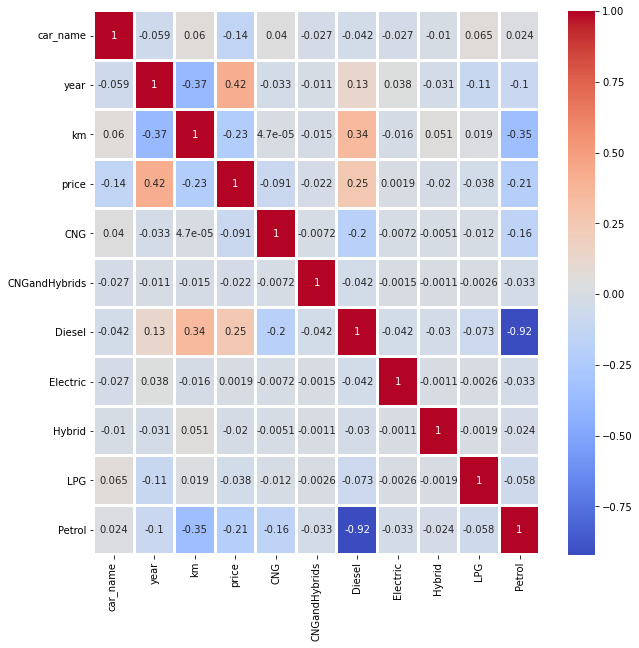

In [30]:
plt.figure(figsize= (10, 10))
sns.heatmap(car_df_new.corr(), annot= True, cmap='coolwarm', linewidths=2)

In [31]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
car_df_sc= sc.fit_transform(car_df_new)
car_df_sc= sc.transform(car_df_new)

In [32]:
car_df_sc

array([[ 2.83308381, -1.13314198, -0.16562394, ..., -0.02760788,
        -0.06775445, -0.85701704],
       [-0.68858152,  0.34555481,  0.19861779, ..., -0.02760788,
        -0.06775445, -0.85701704],
       [-0.68858152,  1.08490321, -0.80787456, ..., -0.02760788,
        -0.06775445, -0.85701704],
       ...,
       [-0.04827873,  0.34555481, -0.07573036, ..., -0.02760788,
        -0.06775445, -0.85701704],
       [-0.68858152,  0.09910534, -0.39604345, ..., -0.02760788,
        -0.06775445, -0.85701704],
       [-0.36843013,  0.59200428, -0.83075407, ..., -0.02760788,
        -0.06775445,  1.16683795]])

In [33]:
x= car_df_new.drop(['price'], axis=1)
x.head()

,car_name,year,km,CNG,CNGandHybrids,Diesel,Electric,Hybrid,LPG,Petrol
0,12,2009.0,62071.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,2015.0,77991.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1,2018.0,34000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,2,2018.0,58000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1,2006.0,71000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
y= car_df_new['price']
y.head()

0     290000.0
3     665000.0
5    1750000.0
6    2850000.0
9     175000.0
Name: price, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=5)

NameError: name 'y' is not defined